<h1>Thai segmentation using tf-idf</h1>
<p>In this python notebook, I'll try to demonstrate how to use term frequency (tf) 
and inverse document frequency (idf) to use in thai word segmentation. 
By this method, you won't need any dictionary beforehand </p>

<p>First let's import library and dataset.</p>

In [1]:
# -*- coding: utf-8 -*-
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import timeit

In [2]:
#Load dataset
dataset = pd.read_excel("dataset/pokemon TW TH search.xlsx",skiprows=1)

<h2>Let's explore the dataset</h2>

In [3]:
dataset.head()

,Date,Screen Name,Full Name,Tweet Text,Tweet ID,App,Followers,Follows,Retweets,Favorites,Verfied,User Since,Location,Bio,Profile Image,Google Maps
0,2016-09-12 07:06:00,@Aumbrella99,อั้มคีย์ดิสแก้บน™,RT @bluesherbet_: #สาระ ทำไมเล่นเกม Pokémon Go...,775334650218582018,Twitter for iPhone,417,366,136,0,No,2010-09-01 03:42:30,•SHINee World•,SHINee★ NCT♪ J.Jaehyun ε=กำลังแจวเรือ #jaeten ...,View,NaN
1,2016-09-12 07:06:43,@2543Napas,☞NPs ft.เอลฟ์อี้ชิง☜,RT @bluesherbet_: #สาระ ทำไมเล่นเกม Pokémon Go...,775334831211151360,Twitter for Android,160,267,136,0,No,2013-01-18 02:42:58,NaN,BANA|S♡NE|EXO-L|IGOT7 ❤❤❤ GONGCHAN|YOONA|YIXIN...,View,NaN
2,2016-09-12 07:13:56,@ao_amitra,Amitra,RT @thaimarketing: ที่คั่นหนังสือ Pokémon GO ท...,775336649618100224,Twitter for iPhone,72,88,840,0,No,2010-11-16 09:37:07,Bangkok,NaN,View,NaN
3,2016-09-12 07:14:40,@SolarSystem_14,❤ป๋าจุน บัตรเดียวจอด,RT @bluesherbet_: #สาระ ทำไมเล่นเกม Pokémon Go...,775336832997298177,Twitter for Android,1030,135,136,0,No,2012-03-24 13:17:26,"Bangkok,Thailand ❤ EXO Planet",พี่ดงกยู&พี่ยูรา l คุณคนเล็ก พี่เชร้ l มาดามสเ...,View,NaN
4,2016-09-12 07:23:52,@PoppapzWatchaCh,ㅍㅍㅈㅎ,RT @bluesherbet_: #สาระ ทำไมเล่นเกม Pokémon Go...,775339149188403200,Twitter for iPhone,666,981,136,0,No,2010-12-05 11:25:17,Thailand♥KKU,"안녕하세요 ~ 난 팝팹이에요,태국 대학생이에요 ~ 여러분~ 만나서 반가워요.☺️",View,NaN


In [4]:
print("We have "+str(dataset.shape[0])+" number of rows")

We have 37344 number of rows


<h2>Next step is Data Preprocess.</h2><p> I will create a string contain all of tweet text joined together so that it is faster to count tf.</p>

<p>No need to normalize anything because we only want to count number of occurence of words</p>

In [5]:
#Get Tweet text as string
fileString = ''
for index,rows in dataset.iterrows():
        fileString += (rows['Tweet Text']+"|")        

In [6]:
#Save fileString as txt so that we won't have to wait for fileString everytime.
with open("dataset/tweetText.txt", "wb") as f:
    f.write(fileString.encode("utf-8"))

In [7]:
stringLength = len(fileString)
print("FileString length is "+str(stringLength))
print("Estimate word in fileString : "+str(int(stringLength/6)))

FileString length is 4725150
Estimate word in fileString : 787525


<h2>Then we will create a function to count tf/idf of the word</h2>
<p>For tf, we just count how many occurance of the word is in fileString</p>
<p>For df, we will iterate through the dataset and count how many row contains the word</p>

In [8]:
def count_tf(word,fileString=fileString):
    return fileString.count(word)
count_tf('เกม',fileString)    

7889

In [9]:
def count_df(word,dataset=dataset):
    df = 0
    for index,rows in dataset.iterrows():
        if(word in rows['Tweet Text']):
            df+=1
    return df
count_df('เกม')

7249

<h2>Next is visualizing tf/df</h2>
<p>Now let's look at the tf and df of a word in a sentence and how tf/df decreases.</p>

In [10]:
sentences = ['ลองทดสอบตัด','เกมนี้สนุกมากๆ','อยากออกไปเล่นเกมข้างนอก','พรุ่งนี้พ่อจะพาไปสยาม']

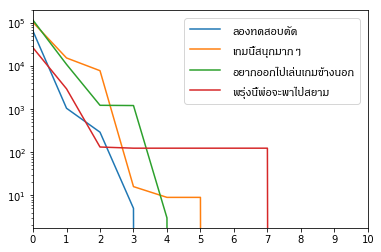

[[65060, 1058, 294, 5, 0, 0, 0, 0, 0, 0, 0], [104272, 15589, 7889, 16, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0], [117190, 11061, 1239, 1223, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [26792, 2995, 133, 125, 125, 125, 125, 125, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
Execution time : 0.98s.


In [11]:

def count_tfs(sentence,fileString=fileString):
    tfs = []
    for i in range(len(sentence)):
        word = sentence[:i+1]
        tfs.append(count_tf(word))
    return tfs
def visualize_tf(sentences,fileString=fileString):
    tfs_list = []
    for sentence in sentences:
        tfs_list.append(count_tfs(sentence,fileString))
    for i,tfs in enumerate(tfs_list):
        plt.plot(tfs,label=sentences[i])
    plt.xticks(np.arange(0, 15, 1.0))
    plt.xlim([0,10])
    plt.yscale('log', nonposy='clip')
    plt.rc('font',family='JasmineUPC')
    plt.legend(fontsize=15)
    plt.yscale('log')
    plt.show()
    print(tfs_list)
    
start = timeit.default_timer()
visualize_tf(sentences)
stop = timeit.default_timer()
print("Execution time : "+str(round(stop - start,2))+"s.")

#Ignore this, dfs is too slow. (about 1 mins)
def count_dfs(sentence,fileString=fileString):
    dfs = []
    for i in range(len(sentence)):
        word = sentence[:i+1]
        dfs.append(count_df(word))
    return dfs
def visualize_df(sentences,fileString=fileString):
    dfs_list = []
    for sentence in sentences:
        dfs_list.append(count_dfs(sentence,fileString))
    for i,dfs in enumerate(dfs_list):
        plt.plot(dfs,label=sentences[i])
    plt.xticks(np.arange(0, 6, 1.0))
    plt.xlim([0,6])
    plt.yscale('log', nonposy='clip')
    plt.rc('font',family='JasmineUPC')
    plt.legend(fontsize=20)
    plt.yscale('log')
    plt.show()
    print(dfs_list)
    
start = timeit.default_timer()
visualize_df(sentences)
stop = timeit.default_timer()
print("Execution time : "+str(round(stop - start,2))+"s.")

<h3>You can see that tf/df always drop drastically when the word go pass through word boundary</h3>
<p>We will use only tf for now because computing df is very slow compare to tf</p>

<h3>Now let's try using to find word boundary.</h3>
<p>Let's assume that tf will decrease 'drastically' when pass through word boundary</p>

In [12]:
#This function wil do a brute force tf count and count when the tf drop drastically at that index 
def tf_drop_count(sentence,fileString=fileString):
    l = len(sentence)
    pass_boundary_counts = [0]*l
    for i in range(l):
        tfs = [0]*(i)+count_tfs(sentence[i:])
        #My heuristic function is if current*12 is still less then previous then it has pass word boundary
        for i in range(1,len(tfs)):
            if((tfs[i]+1)*12<tfs[i-1] and tfs[i-2]!=0 and i-2>0):
                pass_boundary_counts[i]+=1
    return pass_boundary_counts

for sentence in sentences:
    print(tf_drop_count(sentence))
    print(sentence)
    
            


[0, 0, 0, 2, 2, 0, 1, 0, 4, 0, 3]
ลองทดสอบตัด
[0, 0, 0, 2, 0, 0, 3, 3, 0, 0, 3, 0, 0, 2]
เกมนี้สนุกมากๆ
[0, 0, 0, 0, 3, 2, 0, 0, 0, 3, 1, 0, 0, 1, 0, 0, 6, 1, 1, 0, 0, 0, 0]
อยากออกไปเล่นเกมข้างนอก
[0, 0, 0, 0, 1, 1, 0, 0, 7, 2, 0, 2, 1, 2, 2, 1, 0, 2, 2, 0, 1]
พรุ่งนี้พ่อจะพาไปสยาม


<h2>Now we will seperate word based on these pass boundary count.</h2><p> If higher boundary counts, then it is more likely that it has already pass word boundary.</p>

In [13]:
def segment(sentence):
    word = ''
    wordList = []
    pass_boundary_counts = tf_drop_count(sentence)
    curCount = pass_boundary_counts[0]
    nextCount = pass_boundary_counts[1]
    
    for i in range(len(sentence)-1):
        s = sentence[i]
        prevCount=curCount
        curCount=nextCount
        nextCount= pass_boundary_counts[i+1]
        if(prevCount<curCount and curCount>=nextCount and curCount>1 and (prevCount==0 or nextCount==0)):
            wordList.append(word)
            word = ''
        word+=s
    word+=sentence[-1]
    wordList.append(word)
    print(pass_boundary_counts)
    print(wordList)
    return wordList
for sentence in sentences:
    segment(sentence)

[0, 0, 0, 2, 2, 0, 1, 0, 4, 0, 3]
['ลอง', 'ทดสอบ', 'ตัด']
[0, 0, 0, 2, 0, 0, 3, 3, 0, 0, 3, 0, 0, 2]
['เกม', 'นี้', 'สนุก', 'มากๆ']
[0, 0, 0, 0, 3, 2, 0, 0, 0, 3, 1, 0, 0, 1, 0, 0, 6, 1, 1, 0, 0, 0, 0]
['อยาก', 'ออกไป', 'เล่นเกม', 'ข้างนอก']
[0, 0, 0, 0, 1, 1, 0, 0, 7, 2, 0, 2, 1, 2, 2, 1, 0, 2, 2, 0, 1]
['พรุ่งนี้', 'พ่อ', 'จะพาไป', 'สยาม']


<h2>Some difficult to segment example</h2>
<p>These might be word that don't occur that often in the corpus, or word that can be cut in many possible way</p>

In [14]:
hard_sentences = ['ตากลมหรือตากลม','คิดไม่ออกเหมือนกัน','อยากเล่นเกมข้างนอกบ้านมากเลย','ลองอีกซักอันนะครับ','อาหารและยาเป็นสิ่งจำเป็นสำหรับมนุษย์']
for sentence in hard_sentences:
    segment(sentence)

[0, 0, 0, 2, 2, 1, 1, 0, 0, 3, 0, 5, 2, 2]
['ตาก', 'ลมหรือ', 'ตา', 'กลม']
[0, 0, 0, 2, 1, 0, 2, 2, 0, 2, 3, 1, 0, 0, 0, 5, 0, 0]
['คิด', 'ไม่', 'ออกเหมือน', 'กัน']
[0, 0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 6, 1, 1, 0, 0, 0, 0, 6, 1, 0, 0, 3, 0, 0, 3, 0, 0]
['อยาก', 'เล่น', 'เกม', 'ข้างนอก', 'บ้าน', 'มาก', 'เลย']
[0, 0, 0, 2, 1, 0, 3, 1, 0, 2, 1, 0, 1, 1, 1, 2, 0, 0]
['ลอง', 'อีก', 'ซัก', 'อันนะค', 'รับ']
[0, 0, 0, 1, 1, 1, 2, 1, 2, 3, 1, 0, 0, 0, 4, 1, 2, 0, 3, 1, 2, 1, 0, 0, 4, 4, 0, 0, 0, 0, 4, 2, 1, 1, 0, 0]
['อาหารและยาเป็น', 'สิ', '่ง', 'จำเป็น', 'สำหรับ', 'มนุษย์']


<h3>Conclusion</h3>
<p>As you can see, this approach can (kind of) segment words from sentence without using any dictionary.</p>
<p>Can be more accurate if improve the algorithm for cutting the word based on word_pass_count</p>

<h4>Referecenes</h4>
<ul>
<li>Virach Sornlertlamvanich. Word Segmentation for Thai in Machine Translation System. Machine Translation, National Electronics and Computer Technology Center, Bangkok. pp. 50-56, 1993. (in Thai)***</li>
</ul>